In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [30]:
auto=pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')
auto.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
HousePrice         99 non-null int64
HsPrc ($10,000)    99 non-null float64
CrimeRate          99 non-null float64
MilesPhila         99 non-null float64
PopChg             98 non-null float64
Name               99 non-null object
County             99 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ KB


In [4]:
auto['County'].value_counts()

Montgome    29
Delaware    26
Bucks       19
Chester     17
Phila        8
Name: County, dtype: int64

In [5]:
auto['PopChg'].value_counts().head()

 1.9    3
 1.6    3
 1.5    3
-1.0    2
 7.8    2
Name: PopChg, dtype: int64

In [6]:
auto.describe()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg
count,99.000000,99.000000,99.000000,99.000000,98.000000
mean,157835.606061,15.783561,32.576768,19.282828,2.479592
std,86644.159973,8.664416,37.540908,9.099552,5.632307
min,28000.000000,2.800000,6.600000,0.000000,-9.200000
25%,98505.000000,9.850500,17.400000,13.000000,-0.625000
50%,140463.000000,14.046300,24.100000,20.000000,1.600000
75%,195830.000000,19.583000,39.800000,24.500000,4.775000
max,475112.000000,47.511200,366.100000,50.000000,26.900000


D:\Anaconda3\envs\Pandas\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Anaconda3\envs\Pandas\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Anaconda3\envs\Pandas\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Anaconda3\envs\Pandas\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000097F3D38348>,
      dtype=object)

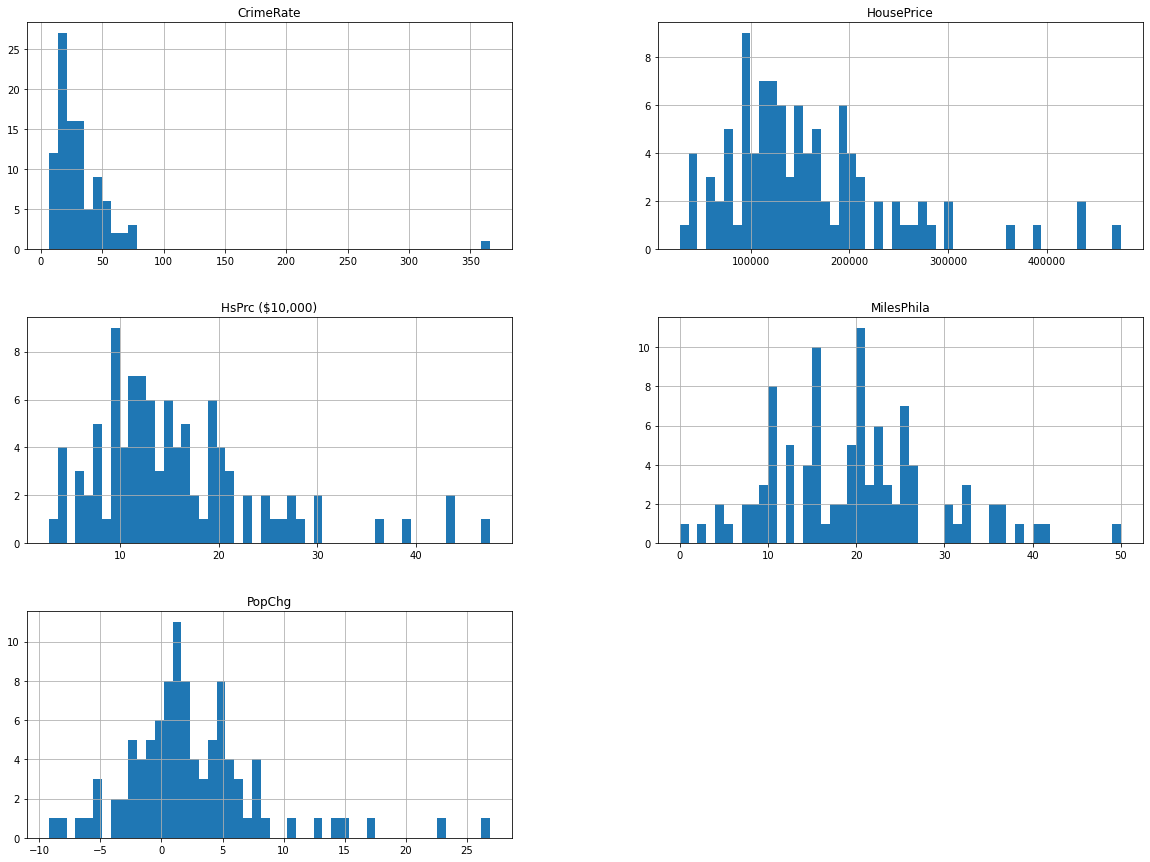

In [7]:
import matplotlib.pyplot as plt
auto.hist(bins=50, figsize=(20, 15))

In [8]:
# Correlation 

corr_mat=auto.corr()
corr_mat['HousePrice'].sort_values(ascending=False)

HousePrice         1.000000
HsPrc ($10,000)    1.000000
MilesPhila         0.149764
PopChg             0.135624
CrimeRate         -0.249961
Name: HousePrice, dtype: float64

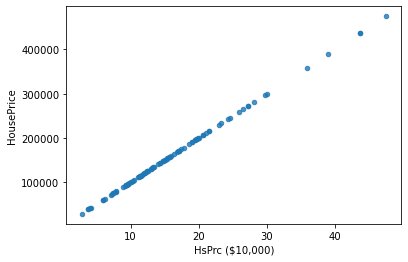

In [9]:
# Ploting HousePrice with its most correlated feature
auto.plot(kind="scatter", x="HsPrc ($10,000)", y="HousePrice", alpha=0.8)

# This graph Looks like overfitting the data 

In [10]:
# Adding a new Feature 

auto["HsPrcCrime"] = auto['HsPrc ($10,000)']/auto['CrimeRate']
auto.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County,HsPrcCrime
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome,0.472939
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome,0.469017
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware,0.636851
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks,0.223664
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks,0.146255


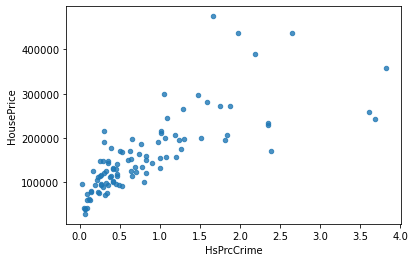

In [11]:
auto.plot(kind="scatter", x="HsPrcCrime", y="HousePrice", alpha=0.8)

In [12]:
feature=['CrimeRate']
x=auto[feature]
y=auto['HousePrice']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
print(linreg)
print(linreg.intercept_)
print(linreg.coef_)
print(linreg.score(x_train,y_train))
print(linreg.score(x_test,y_test))

LinearRegression()
228691.78347902486
[-2373.64491904]
0.2113022742733034
-3.0308649464459325


In [13]:
feature1=['HsPrcCrime']
X=auto[feature1]
Y=auto['HousePrice']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

from sklearn.linear_model import LinearRegression
linreg1=LinearRegression()
linreg1.fit(X_train,Y_train)
print(linreg1)
print(linreg1.intercept_)
print(linreg1.coef_)
print(linreg1.score(X_train,Y_train))
print(linreg1.score(X_test,Y_test))

LinearRegression()
91490.30894202538
[77051.56376342]
0.5794351456324325
0.5466235926811196


In [14]:
# Clearly Model2 is have better score than Model1 
# Now we will work on Model 2 

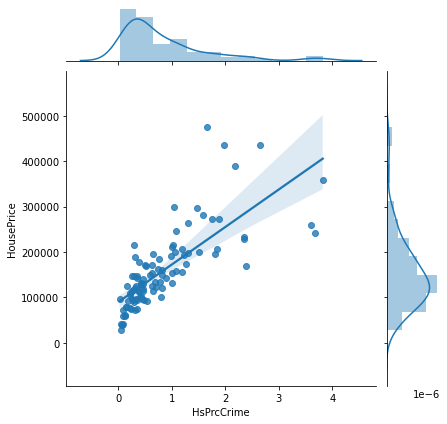

In [15]:
sns.jointplot(auto['HsPrcCrime'],auto['HousePrice'], kind='reg')

In [16]:
auto_nocc = auto[auto['HousePrice']<400000  ]

In [17]:
feature=['HsPrcCrime']
X=auto_nocc[feature]
y=auto_nocc['HousePrice']

In [18]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test= train_test_split(X,y, random_state=1)
                                                    
linreg2=LinearRegression()
linreg2.fit(X_train,y_train)
print(linreg2)
print(linreg2.intercept_)
print(linreg2.coef_)
print(linreg2.score(X_train,y_train))
print(linreg2.score(X_test,y_test))

LinearRegression()
90092.15234467681
[76583.36855267]
0.5645193135595563
0.6562701961746562


In [20]:
feature=['HsPrcCrime','MilesPhila', 'CrimeRate','PopChg']
X=auto_nocc[feature]
y=auto_nocc['HousePrice']

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test= train_test_split(X,y, random_state=1)
                                                    
linreg2=LinearRegression()
linreg2.fit(X_train,y_train)
print(linreg2)
print(linreg2.intercept_)
print(linreg2.coef_)
print(linreg2.score(X_train,y_train))
print(linreg2.score(X_test,y_test))


LinearRegression()
83961.07988090432
[7.73620812e+04 1.49800300e+02 6.38009423e+01 1.96303669e+02]
0.5666481999111104
0.6660593175035558


In [21]:

def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predictions = intercept + slope * input_feature
    
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = predictions - output
    
    # square the residuals and add them up
    square_residual = residuals * residuals
    sum_square_residual = square_residual.sum()
    RSS = sum_square_residual
    
    return(RSS)

In [22]:
Value=get_residual_sum_of_squares(auto['HsPrcCrime'],auto['HousePrice'], linreg.intercept_ , linreg.coef_)
Value

1230273826288.354

In [23]:
Value=get_residual_sum_of_squares(auto['CrimeRate'],auto['HousePrice'], linreg.intercept_ , linreg.coef_)
Value

1139749109915.8193

In [24]:
# RSS Value is very high in case CrimeRate Than our predicted feature 


In [25]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + (slope * input_feature)
    return predicted_values

In [26]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, linreg.intercept_, linreg.coef_)
print(estimated_price )

[-6061467.2519892]


In [27]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output - intercept)/slope
    return estimated_feature

In [28]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, linreg.intercept_, linreg.coef_)
print(estimated_squarefeet)

[-240.68815514]
